#WEEK2 事前課題
##課題１　小麦とチェス盤問題
###【問題1】2×2マスのチェス盤の小麦の数

In [48]:
import numpy as np


#4データの配列の作成
n_squares = 4
small_board_list = [1]
for _ in range(n_squares -1):
  small_board_list.append( 2*small_board_list[-1])

#ndarrayを作成して変形
small_board_ndarray = np.array(small_board_list)
small_board_ndarray.shape = (2,2)

print(small_board_ndarray)


[[1 2]
 [4 8]]
int64


###【問題２】n×mマスへの拡張

In [50]:
#関数の定義

def chess_wheat(raw,col):
  
  #データの配列の作成
  n_squares = raw * col
  small_board_list = [1]
  for _ in range(n_squares -1):
    small_board_list.append( 2*small_board_list[-1])
  
  #ndarrayを作成して変形
  small_board_ndarray = np.array(small_board_list)
  small_board_ndarray.shape = (raw,col)
  
  return small_board_ndarray

#8x8マスのチェス盤の小麦の数
wheat_8b8 = chess_wheat(8,8)
print(wheat_8b8)
print(wheat_8b8.dtype) #型の確認

[[1.0000000000000000e+00 2.0000000000000000e+00 4.0000000000000000e+00
  8.0000000000000000e+00 1.6000000000000000e+01 3.2000000000000000e+01
  6.4000000000000000e+01 1.2800000000000000e+02]
 [2.5600000000000000e+02 5.1200000000000000e+02 1.0240000000000000e+03
  2.0480000000000000e+03 4.0960000000000000e+03 8.1920000000000000e+03
  1.6384000000000000e+04 3.2768000000000000e+04]
 [6.5536000000000000e+04 1.3107200000000000e+05 2.6214400000000000e+05
  5.2428800000000000e+05 1.0485760000000000e+06 2.0971520000000000e+06
  4.1943040000000000e+06 8.3886080000000000e+06]
 [1.6777216000000000e+07 3.3554432000000000e+07 6.7108864000000000e+07
  1.3421772800000000e+08 2.6843545600000000e+08 5.3687091200000000e+08
  1.0737418240000000e+09 2.1474836480000000e+09]
 [4.2949672960000000e+09 8.5899345920000000e+09 1.7179869184000000e+10
  3.4359738368000000e+10 6.8719476736000000e+10 1.3743895347200000e+11
  2.7487790694400000e+11 5.4975581388800000e+11]
 [1.0995116277760000e+12 2.1990232555520000e+

＜残課題＞ndarrayのprint表示形式を以下のコードで変更できるようだが、うまくいかない
np.set_printoptions(suppress=True, floatmode='unique')

指数表記をなんとかしたいんだが...
　→型を調べると、float64と判明。

###【問題３】小麦の数の合計

In [24]:
#8x8マスの小麦の合計

print(np.sum(wheat_8b8))

1.8446744073709552e+19


In [27]:
#列ごとの平均
wheat_8b8_mean = np.mean(wheat_8b8, axis=0)
print(wheat_8b8_mean)

[9.0425216047595840e+15 1.8085043209519168e+16 3.6170086419038336e+16
 7.2340172838076672e+16 1.4468034567615334e+17 2.8936069135230669e+17
 5.7872138270461338e+17 1.1574427654092268e+18]


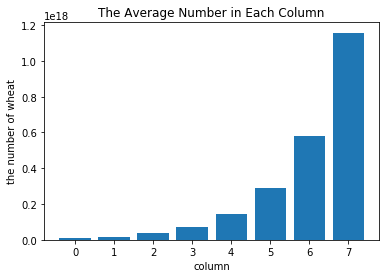

In [31]:
#列ごとの平均を棒グラフとして表示
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("the number of wheat")
plt.title("The Average Number in Each Column")
plt.bar(np.arange(8),wheat_8b8_mean)
plt.show()

###【問題４】小麦の数のヒートマップ

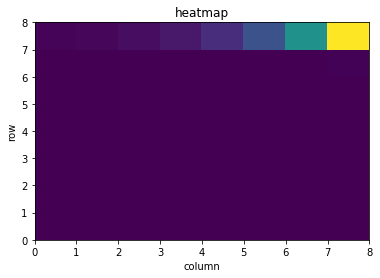

In [32]:
#8x8マスの小麦の数をヒートマップとして可視化

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(wheat_8b8)
plt.show()

###【問題５】後半は前半の何倍か

In [39]:

print(
    np.sum(wheat_8b8[4:, :]) #後半の小麦数
  / np.sum(wheat_8b8[:4, :]) #前半の小麦数
  )

4294967296.0


###【問題６】他の計算方法によるn×mマスへの拡張


In [47]:
"""
np.append を使用した関数定義
"""
def chess_wheat_ap(raw,col):
  n_squares = raw * col
  board_ndarray = np.array([1]).astype(np.uint64)
  for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 
                                                2*board_ndarray[-1])
  #二次元配列に変換
  board_ndarray.shape = (raw,col)
  
  return board_ndarray

#8x8マスのチェス盤の小麦の数
wheat_8b8_ap = chess_wheat_ap(8,8)
print(wheat_8b8_ap)

[[1.0000000000000000e+00 2.0000000000000000e+00 4.0000000000000000e+00
  8.0000000000000000e+00 1.6000000000000000e+01 3.2000000000000000e+01
  6.4000000000000000e+01 1.2800000000000000e+02]
 [2.5600000000000000e+02 5.1200000000000000e+02 1.0240000000000000e+03
  2.0480000000000000e+03 4.0960000000000000e+03 8.1920000000000000e+03
  1.6384000000000000e+04 3.2768000000000000e+04]
 [6.5536000000000000e+04 1.3107200000000000e+05 2.6214400000000000e+05
  5.2428800000000000e+05 1.0485760000000000e+06 2.0971520000000000e+06
  4.1943040000000000e+06 8.3886080000000000e+06]
 [1.6777216000000000e+07 3.3554432000000000e+07 6.7108864000000000e+07
  1.3421772800000000e+08 2.6843545600000000e+08 5.3687091200000000e+08
  1.0737418240000000e+09 2.1474836480000000e+09]
 [4.2949672960000000e+09 8.5899345920000000e+09 1.7179869184000000e+10
  3.4359738368000000e+10 6.8719476736000000e+10 1.3743895347200000e+11
  2.7487790694400000e+11 5.4975581388800000e+11]
 [1.0995116277760000e+12 2.1990232555520000e+

In [45]:
"""
ブロードキャスト を使用した関数定義
"""
def chess_wheat_bc(raw,col):
  n_squares = raw * col
  indices_of_squares = np.arange(n_squares).astype(np.uint64)
  board_ndarray = 2**indices_of_squares
 
  #二次元配列に変換
  board_ndarray.shape = (raw,col)
  
  return board_ndarray

#8x8マスのチェス盤の小麦の数
wheat_8b8_bc = chess_wheat_bc(8,8)
print(wheat_8b8_ap)

[[1.0000000000000000e+00 2.0000000000000000e+00 4.0000000000000000e+00
  8.0000000000000000e+00 1.6000000000000000e+01 3.2000000000000000e+01
  6.4000000000000000e+01 1.2800000000000000e+02]
 [2.5600000000000000e+02 5.1200000000000000e+02 1.0240000000000000e+03
  2.0480000000000000e+03 4.0960000000000000e+03 8.1920000000000000e+03
  1.6384000000000000e+04 3.2768000000000000e+04]
 [6.5536000000000000e+04 1.3107200000000000e+05 2.6214400000000000e+05
  5.2428800000000000e+05 1.0485760000000000e+06 2.0971520000000000e+06
  4.1943040000000000e+06 8.3886080000000000e+06]
 [1.6777216000000000e+07 3.3554432000000000e+07 6.7108864000000000e+07
  1.3421772800000000e+08 2.6843545600000000e+08 5.3687091200000000e+08
  1.0737418240000000e+09 2.1474836480000000e+09]
 [4.2949672960000000e+09 8.5899345920000000e+09 1.7179869184000000e+10
  3.4359738368000000e+10 6.8719476736000000e+10 1.3743895347200000e+11
  2.7487790694400000e+11 5.4975581388800000e+11]
 [1.0995116277760000e+12 2.1990232555520000e+

###【問題7】計算時間の比較

In [52]:
#ベーシック
%%timeit
t = chess_wheat(8,8)

The slowest run took 8.45 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.1 µs per loop


In [53]:
#append
%%timeit
t2 = chess_wheat_ap(8,8)

The slowest run took 14.47 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 236 µs per loop


In [55]:
#bloadcast
%%timeit
t3 = chess_wheat_bc(8,8)

The slowest run took 248.00 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.36 µs per loop


【結果】
もっとも処理速度が速かったのはブロードキャスト
その次がベーシック
もっとも遅かったのがnp.append